<a href="https://colab.research.google.com/github/PatrickRuan/3rd-ML100Days/blob/master/homework/Day_005_2_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [0]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [27]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [28]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[0]


9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

#### 剛剛已經將 data 分行了，
#### 現在要做一個 dataframe, 一般而言有兩種方法，

1.   dict
2.   zip

#### dictionary


1.   將資料分隔成 columns data 存入一個個 list
2.   製作 dictionary = {'col1':list1, 'col2':list2,...}

#### dictionary 的第一個項目應該是 需要 split tag




In [29]:
import pandas as pd
col1 = []
col2 = []
data_row =[]
count=0
data=data[:len(data)-1]

split_tag ='\t'

for i in data:   
    data_row = i.split(split_tag)
    col1.append(data_row[0])
    col2.append(data_row[1])

arrange_data={'Member':col1,'Photo':col2}
df = pd.DataFrame(arrange_data)
df.head()

,Member,Photo
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


In [30]:
ls1=[]
ls2=[]
df2=[]

ls1=['member','url']
ls2 = [col1, col2]
df2 = list(zip(ls1, ls2))  
# 2 * 2 的組合，[0][0] = 'member', [0][1]= col1, [1][0]='photo', [1][1]=col2,
# 如果要看 第一欄資料前5 筆  要用 df2[0][1][:5], 但是如果再往下執行時，df2 會被改為 dataframe...
df2 = pd.DataFrame(dict(df2))
df2.head()

,member,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


In [41]:
df.loc[0,['Photo']]
first_link = df2.loc[1,'url']
first_link


'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg'

## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

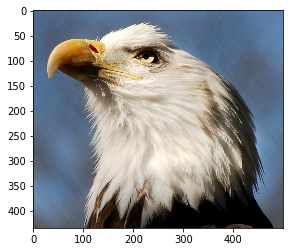

In [43]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,'Photo']

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [0]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    c = 0
    img_list=[]
    for i in url_list:
        img = None
        
        try:
            response = requests.get(i)
            img = Image.open(BytesIO(response.content))
        except:
            print(f"can't open photo #{c}")
        if img is not None:
            img_list.append(img)     
        c=c+1
    
    return img_list
    


can't open photo #4
can't open photo #5
Total images that we got: 4 


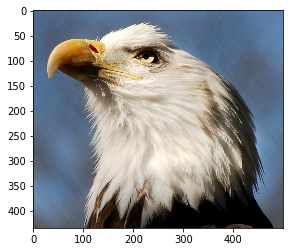

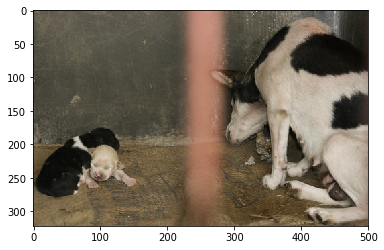

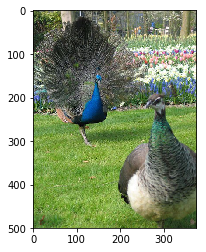

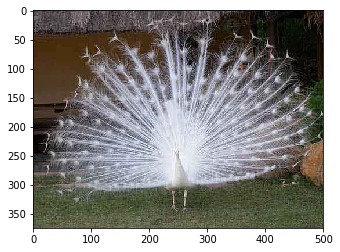

In [52]:
result = img2arr_fromURLs(df.loc[0:5]['Photo'].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()